# Project 2

### Scientific Question: How similar is the CD4 cell surface receptor of animal species that can contract immunodeficiency viruses to the CD4 of species that don't have known contraction of immunodeficiency viruses in terms of nucleotide sequence and protein structure?

CD4 is a transmembrane glycoprotein on that is expressed on the cell surface of T cells. In humans, CD4 is the receptor that initiates the transmembrane fusion between the HIV virus's gp120 envelope and the cellular membrane of T cells. There are other types of immunodeficiency viruses that can be contracted by other species that have their own versions of the CD4 glycoprotein. Contraction of immunodeficiency viruses compromise the functions of the immune system.

There are some species other than humans that can contract a form of the immunodeficiency retrovirus as well as many species that do not contract the virus. The Pan troglodytes, more commonly known as chimpanzees, and Felis catus, also known as the common house cat are known to contract a form of immunodeficiency virus and will be used for the data analysis. Colobus guereza, an old world monkey, and Canis lupus familiaris, the domestic dog, are species that don't have known immunodeficiency virus will also be used for this comparison.

The sequence data being used for this analysis is sourced from the NCBI gene libary which is a government funded public database for biotechnology information. Information on the structure of the proteins of interest are sourced from RCSB's protein data bank which is a database that contains three dimensional structural data of larger biological molecules.

### Scientific Hypothesis: If the presence of CD4 cell surface receptors is the gateway to different variations of immunodeficiency virus infection and pathogenesis, then the CD4 of species that can contract (such as chimpanzees and felines) will have some noticeable sequential or structural difference to those species that do not contract the disease.

When T cells undergo activation, the CD4 cell surface receptors interact closely with MHC's of the immune system, also known as major histocompatibility complexes. Because CD4 structures of many species haven't been completely identified, the structures of these species' MHC will instead be used for structural analysis. The region which we will use for analysis include the α2 and β2 domains since this region directly interacts with CD4.

The amino acid sequences of the CD4 protein are downloaded as fasta files which can be read and analyzed easily by Biopython. The structure of major histocompatibility complexes are downloaded as as PDB files which contain 3D descriptions of proteins.

## Part 1: Load the Packages

The packages loaded for this analysis include:
- Numpy: NumPy is a package that is important for scientific computation. Its main function in this project is its ability to create arrays. Many operations can be performed on these arrays such as mathematical manipulation, shape manipulation, sorting, etc. NumPy will also be usefull in simplifying objects in terms of ranges, lengths, etc. For more information, see: https://numpy.org/doc/stable/user/index.html#user
- Bio: BioPython is an important package that includes a collection of molecules that can deal with biological data within Python. There are many resources and softwares that can be used for bioinformatics and research. BioPython includes parsers that can simplify file formats such as BLAST, Clustalw, FASTA, etc. It even can load online services directly into python such as NCBI, Expasy, etc. For more information, see: http://biopython.org/DIST/docs/tutorial/Tutorial.html
- matplotlib: Matplotlib is a large library for visualization in python. It can be used to create static, animated, or even interactive visualizations. In this project, the main use for this package is to create graphs for visualization. Graphs made from matplotlib include scatter plots, heatmaps, histograms, and many more. For more information, see: https://matplotlib.org/stable/users/index
- seaborn: Seaborn is a visualization libray that can be used in python. It is based off of matplotlib and works on top of it. In this project, this package will mainly be used for the visualization of a heatmap. This package is able to create a heatmap on a matplot from a numpy array. For more information, see: https://seaborn.pydata.org/tutorial.html
- nglview: NGLview is a package that provides a visualization widget that can specifically be used in a Jupyter notebook. In this project, it is used to visualize protein structures. It is able to show these structures directly from a PDB file. This widget can even show interactions and motion views of many small structures. For more information, see: http://nglviewer.org/nglview/latest/

In [1]:
# importing packages
import numpy as np
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from Bio import SeqIO
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import PDB
import matplotlib.pyplot as plt
import seaborn as sb
import nglview as nv

## Part 2: Load in Data and Perform Bioinformatics Analysis
### 2a) Pairwise Sequence Analysis

In [2]:
# assigning fasta file to a variable
human_cd4_aa = 'homo_sapien_CD4_aa.fasta'

# reading in human CD4 and checking fasta file
for seq_record in SeqIO.parse(human_cd4_aa, "fasta"):     
    print(seq_record.id)
    print(seq_record.name)
    print(repr(seq_record.seq))
    print(len(seq_record))
    
# human CD4 sequence variable
human_cd4 = seq_record.seq
# checking sequence
print(human_cd4)

QDC22486.1
QDC22486.1
Seq('MNRGVPFRHLLLVLQLALLPAATQGKKVVLGKKGDTVELTCTASQKKSIQFHWK...SPI')
458
MNRGVPFRHLLLVLQLALLPAATQGKKVVLGKKGDTVELTCTASQKKSIQFHWKNSNQIKILGNQGSFLTKGPSKLNDRADSRRSLWDQGNFPLIIKNLKIEDSDTYICEVEDQKEEVQLLVFGLTANSDTHLLQGQSLTLTLESPPGSSPSVQCRSPRGKNIQGGKTLSVSQLELQDSGTWTCTVLQNQKKVEFKIDIVVLAFQKASSIVYKKEGEQVEFSFPLAFTVEKLTGSGELWWQAERASSSKSWITFDLKNKEVSVKRVTQDPKLQMGKKLPLHLTLPQALPQYAGSGNLTLALEAKTGKLHQEVNLVVMRATQLQKNLTCEVWGPTSPKLMLSLKLENKEAKVSKREKAVWVLNPEAGMWQCLLSDSGQVLLESNIKVLPTWSTPVQPMALIVLGGVAGLLLFIGLGIFFCVRCRHRRRQAERMSQIKRLLSEKKTCQCPHRFQKTCSPI


In [3]:
# establish quicker connection by performing qblast method on our sequence
result_handle = NCBIWWW.qblast("blastp", "nr", human_cd4)
print(result_handle)

In [4]:
# saving blast results to an xml file
with open('CD4_BLASTresults.xml', 'w') as save_file: 
    blast_results = result_handle.read() 
    save_file.write(blast_results)

In [5]:
handle = open("CD4_BLASTresults.xml")
blast_record = NCBIXML.read(handle)

In [6]:
# viewing blast hits
for hit in blast_record.descriptions: 
    print(hit.title)
    print(hit.e)

gb|AAR13802.1| CD4-EGFP [Cloning vector pMACSiBac]
0.0
ref|NP_000607.1| T-cell surface glycoprotein CD4 isoform 1 precursor [Homo sapiens] >ref|NP_001369636.1| T-cell surface glycoprotein CD4 isoform 1 precursor [Homo sapiens] >sp|P01730.1| RecName: Full=T-cell surface glycoprotein CD4; AltName: Full=T-cell surface antigen T4/Leu-3; AltName: CD_antigen=CD4; Flags: Precursor [Homo sapiens] >gb|AAX41622.1| CD4 antigen [synthetic construct] >emb|SJX39576.1| unnamed protein product, partial [Human ORFeome Gateway entry vector] >gb|AAA35572.1| T4 surface glycoprotein precursor [Homo sapiens] >gb|AAB51309.1| surface antigen CD4 [Homo sapiens] >gb|AAH25782.1| CD4 molecule [Homo sapiens]
0.0
gb|AAA16069.1| T4 surface glycoprotein precursor [Homo sapiens]
0.0
ref|XP_008971926.1| T-cell surface glycoprotein CD4 [Pan paniscus]
0.0
gb|ABX56472.1| T-cell surface glycoprotein CD4 [Pan troglodytes] >gb|AKC01945.1| T-cell surface glycoprotein CD4 [Pan troglodytes verus] >gb|ABX56478.1| T-cell surface 

In [7]:
# importing fasta files of four different species
pan_troglodytes_CD4_aa = SeqIO.parse('pan_troglodytes_CD4.fasta', "fasta")
felis_catus_CD4_aa = SeqIO.parse('felis_catus_CD4.fasta', "fasta")
colobus_guereza_CD4_aa = SeqIO.parse('colobus_guereza_CD4.fasta', "fasta")
canis_lupus_familiaris_CD4_aa = SeqIO.parse('canis_lupus_familiaris_CD4.fasta', "fasta")

# list of species and their sequences
species_seq = [pan_troglodytes_CD4_aa, felis_catus_CD4_aa, colobus_guereza_CD4_aa, canis_lupus_familiaris_CD4_aa]

In [8]:
# creating amino acid sequence variables for each species
for seq_record in pan_troglodytes_CD4_aa:
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record)) 
chimp_cd4 = seq_record.seq

for seq_record in felis_catus_CD4_aa:
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
feline_cd4 = seq_record.seq

for seq_record in colobus_guereza_CD4_aa:
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
colobus_cd4 = seq_record.seq

for seq_record in canis_lupus_familiaris_CD4_aa:
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
canine_cd4 = seq_record.seq

QCV56761.1
Seq('MNRGVPFRHLLLVLQLALLPAATQGKKVVLGKKGDTVELTCTASQKKSIQFHWK...SPI')
458
AAB24450.1
Seq('MNQGAAFRHLLLVLQLVMLEAAVPQGKEVVLGKAGGTAELPCQASQKKYMTFTW...NPI')
474
AHY35179.1
Seq('MNRGISFRHLLLVLQLALHPAVTQGKNVVLGKKGDTVELTCNAPSKKNIQFHWK...HRR')
426
CAB37664.1
Seq('LMLQLVMLPAVTPVREVVLGKAGDAVELPCQTSQKKNIHFNWRDSSMVQILGNQ...KRL')
432


In [9]:
# list of CD4 sequences
species_list = [human_cd4, chimp_cd4, feline_cd4, colobus_cd4, canine_cd4]
for species in species_list:
    print(species)
    print('|')

MNRGVPFRHLLLVLQLALLPAATQGKKVVLGKKGDTVELTCTASQKKSIQFHWKNSNQIKILGNQGSFLTKGPSKLNDRADSRRSLWDQGNFPLIIKNLKIEDSDTYICEVEDQKEEVQLLVFGLTANSDTHLLQGQSLTLTLESPPGSSPSVQCRSPRGKNIQGGKTLSVSQLELQDSGTWTCTVLQNQKKVEFKIDIVVLAFQKASSIVYKKEGEQVEFSFPLAFTVEKLTGSGELWWQAERASSSKSWITFDLKNKEVSVKRVTQDPKLQMGKKLPLHLTLPQALPQYAGSGNLTLALEAKTGKLHQEVNLVVMRATQLQKNLTCEVWGPTSPKLMLSLKLENKEAKVSKREKAVWVLNPEAGMWQCLLSDSGQVLLESNIKVLPTWSTPVQPMALIVLGGVAGLLLFIGLGIFFCVRCRHRRRQAERMSQIKRLLSEKKTCQCPHRFQKTCSPI
|
MNRGVPFRHLLLVLQLALLPAATQGKKVVLGKKGDTVELTCTASQKKSIQFHWKNSNQTKILGNQGSFLTKGPSKLNDRVDSRRSLWDQGNFTLIIKNLKIEDSDTYICEVGDQKEEVQLLVFGLTANSDTHLLQGQSLTLTLESPPGSSPSVQCRSPRGKNIQGGKTLSVSQLELQDSGTWTCTVLQNQKKVEFKIDIVVLAFQKASSIVYKKEGEQVEFSFPLAFTVEKLTGSGELWWQAERASSSKSWITFDLKNKEVSVKRVTQDPKLQMGKKLPLHLTLPQALPQYAGSGNLTLALEAKTGKLHQEVNLVVMRATQLQKNLTCEVWGPTSPKLMLSLKLENKEAKVSKREKAVWVLNPEAGMWQCLLSDSGQVLLESNIKVLPTWSTPVQPMALIVLGGVAGLLLFIGLGIFFCVRCRHRRRQAQRMSQIKRLLSEKKTCQCPHRFQKTCSPI
|
MNQGAAFRHLLLVLQLVMLEAAVPQGKEVVLGKAGGTAELPCQASQKKYMTFTWRLSSQVKILESQHSSLILTGSSKL

In [10]:
# performing pairwise alignments to visualize sequences

# alignments between each species compared to humans
alignments = []
for seq in species_list:
    alignment_score = pairwise2.align.globalxx(human_cd4, seq)
    alignments.append(alignment_score)
    
# formatting alignments and retrieving scores
# this shows different variations of alignments that achieve the highest possible score for each pair of species
for alignment in alignments:
    for score in alignment:
        print(format_alignment(*score))

MNRGVPFRHLLLVLQLALLPAATQGKKVVLGKKGDTVELTCTASQKKSIQFHWKNSNQIKILGNQGSFLTKGPSKLNDRADSRRSLWDQGNFPLIIKNLKIEDSDTYICEVEDQKEEVQLLVFGLTANSDTHLLQGQSLTLTLESPPGSSPSVQCRSPRGKNIQGGKTLSVSQLELQDSGTWTCTVLQNQKKVEFKIDIVVLAFQKASSIVYKKEGEQVEFSFPLAFTVEKLTGSGELWWQAERASSSKSWITFDLKNKEVSVKRVTQDPKLQMGKKLPLHLTLPQALPQYAGSGNLTLALEAKTGKLHQEVNLVVMRATQLQKNLTCEVWGPTSPKLMLSLKLENKEAKVSKREKAVWVLNPEAGMWQCLLSDSGQVLLESNIKVLPTWSTPVQPMALIVLGGVAGLLLFIGLGIFFCVRCRHRRRQAERMSQIKRLLSEKKTCQCPHRFQKTCSPI
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
MNRGVPFRHLLLVLQLALLPAATQGKKVVLGKKGDTVELTCTASQKKSIQFHWKNSNQIKILGNQGSFLTKGPSKLNDRADS

## Part 3: Visualization
### 3a) Creating heatmap that shows protein sequence alignment scores

In [11]:
# performing pairwise alignment for heatmap analysis

# importing fasta file containing all sequences
combined_mhc_fasta = SeqIO.parse("combined_cd4_aa.fasta", "fasta")
# creating list and length variables to be used in creating alignments
combined_list = list(SeqIO.parse("combined_cd4_aa.fasta", "fasta"))
length = len(combined_list)

# empty array for alignment scores
alignments_score = np.empty(shape=(length, length))

# creating function that performs pairwise sequence alignment
def pairwise(array, length):
    # for loop over the sequences in fasta file
    for species1 in range(length):
        # second for loop to access a second sequence
        for species2 in range(length):
        # defining two sequences
            seq1 = combined_list[species1].seq
            seq2 = combined_list[species2].seq
            array[species1, species2] = int(pairwise2.align.globalxx(seq1, seq2, score_only=True))
    return array

cd4_alignments = pairwise(alignments_score, length)

[[458. 453. 295. 387. 271.]
 [453. 458. 293. 384. 269.]
 [295. 293. 474. 274. 314.]
 [387. 384. 274. 426. 259.]
 [271. 269. 314. 259. 432.]]


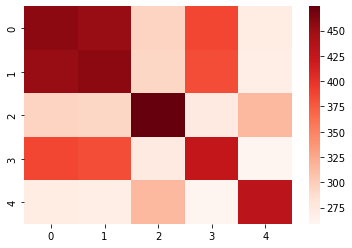

In [12]:
# visualize alignment scores matrix
print(alignments_score)

# using seaborn to create heatmap from the alignment array
heat_map = sb.heatmap(alignments_score, cmap="Reds")
plt.show()

### 2b) Protein Structural Analysis

In [13]:
# parsing allows for the ease of access to the components of the PDB files
parser = PDB.PDBParser(QUIET=True)
# dictionary containing familiar species name as keys and structure from PDB files as values
species_mhc = {'human':parser.get_structure("human_mhc", "human_mhc.pdb"), 'feline':parser.get_structure("feline_mhc", "feline_mhc.pdb"), 'macaque':parser.get_structure("macaque_mhc", "macaque_mhc.pdb"), 'canine':parser.get_structure("canine_mhc", "canine_mhc.pdb")}
# creating global list of calculated distances for ease of access
domain_distance = []

for name, mhc in species_mhc.items():
    # retrieving species MHC structure
    structure = mhc
    model = structure[0]
    # these chain variables define the chains that contain the alpha and beta domains of MHC  
    chain1 = model['A']
    chain2 = model['B']
    # retrieving amino acid residue within the α2 and β2 domains
    residue1 = list(chain1.get_residues())[128]
    residue2 = list(chain2.get_residues())[15]
    # for consistency between species, the alpha carbon will be used for each residue position
    pos1 = residue1['CA']
    pos2 = residue2['CA']
    # next three lines are used to calculate the distance between the involved regions
    diff = pos1 - pos2
    sum_square = np.dot(diff, diff)
    distance = np.sqrt(sum_square)
    # appending distance values to global variable
    domain_distance.append(distance)
    print('distance between α2 and β2 domains of', name, 'MHC:', distance)
# checking if values are appended to list
print('domain_distance check:', domain_distance)

distance between α2 and β2 domains of human MHC: 50.19876
distance between α2 and β2 domains of feline MHC: 50.176838
distance between α2 and β2 domains of macaque MHC: 52.08554
distance between α2 and β2 domains of canine MHC: 49.561295
domain_distance check: [50.19876, 50.176838, 52.08554, 49.561295]


## 3b) Reference Structures for MHC complexes

In [14]:
# structure of human MHC (shown in red and orange)
structure1 = nv.show_biopython(parser.get_structure("human_mhc", "human_mhc.pdb"))
structure1

NGLWidget()

In [15]:
# structure of feline MHC
structure2 = nv.show_biopython(parser.get_structure("feline_mhc", "feline_mhc.pdb"))
structure2

NGLWidget()

In [16]:
# structure of macaque MHC
structure3 = nv.show_biopython(parser.get_structure("macaque_mhc", "macaque_mhc.pdb"))
structure3

NGLWidget()

In [17]:
# structure of canine MHC (shown in red and orange)
structure4 = nv.show_biopython(parser.get_structure("canine_mhc", "canine_mhc.pdb"))
structure4

NGLWidget()

## Part 4: Analysis of the Results
The heatmap seen in part 3a shows the similarities between the amino acid sequences of different species compared to one another. These species include the Homo sapiens, Pan troglodytes, Felis catus, Colobus guereza, and Canis lupus. The center diagonal shows the highest scores of similarity since it is a comparison of a species to itself. The variability in this center diagonal is caused by the amino acid sequences of each species having slight variation in length. The animal species can be broken up into primates and other mammals. Within the primates, it can be seen that chimpanzees have a higher pairwise analysis score with humans of 453 compared to the guereza, an old world monkey, which has a score of 387. For the other mammals, the feline's score to humans is 295 while the canines have a score of 271. These pairwise analysis results show that the species known to contract a form of immunodeficiency viruses (chimpanzees and felines) have a higher similarity to human CD4 amino acid sequence than species that don't contract these viruses. This is one of the results that show the importance of CD4 as a T cell receptor in contracting HIV and similar viruses.

The results seen in 2b are derived from the structural analysis of species' MHC. The MHC structure was used because of its physical interaction with CD4. The α2 and β2 domains of MHC closely interact with CD4 and analysis of these domains can show how similar CD4 in humans is to other species in terms of structure. For this section, species used for comparison are familiarly known as humans, felines, macaques (an old world monkey), and canines. The structural analysis consisted of finding the distance between the α2 and β2 regions. The distance between these regions was 50.20Å in humans, 50.18Å in felines, 52.09Å in macaques, and 49.56 in canines. According to these results, humans and felines have a very similar structural distance in the region in which MHC interacts with CD4 while macaques and canines have a larger difference in their distances to humans. This structural differences is another detail that highlights the significance of CD4 and its interaction with HIV. Thus, my hypothesis that the contraction of HIV and similar viruses is highly dependent on the features of the CD4 transmembrane glycoprotein within an organism is correct.